<a href="https://colab.research.google.com/github/Rasamps/drug-misuse/blob/master/apply_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

df = pd.read_csv("drug_cons_data.csv", header = 0)

In the following code segment, we drop the variables based on the work done in the dimensionality reduction tests.

In [8]:
le_data = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Amph','Benz'])
ohe_data = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Amph','Benz'])
print(le_data.head())
print(ohe_data.head())

    Ascore   Cscore   Escore   Nscore   Oscore Amph Benz
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL2  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL2  CL0
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL0  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL0  CL3
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL1  CL0
    Ascore   Cscore   Escore   Nscore   Oscore Amph Benz
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL2  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL2  CL0
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL0  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL0  CL3
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL1  CL0


As the PCA algorithm requires numeric values...
We will use both LabelEncoder() and OneHotEncoder() to switch the Amph and Benz categorical variables to numeric labels.

In [9]:
#Label Encoded Dataframe
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()

for col in le_data.columns:
  if (le_data[col].dtype == np.object):
    le_data[col] = le.fit_transform(le_data[col])

print(le_data.head())

    Ascore   Cscore   Escore   Nscore   Oscore  Amph  Benz
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331     2     2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533     2     0
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732     0     0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928     0     3
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174     1     0


In [10]:
#One Hot Encoded Dataframe

ohe = preprocessing.OneHotEncoder(sparse = False)

encoded_amph = le.fit_transform(ohe_data['Amph'])
encoded_benz = le.fit_transform(ohe_data['Benz'])

ohe_data = ohe_data.drop(columns = ['Amph','Benz'])

ohe_amph = ohe.fit_transform(encoded_amph.reshape(len(encoded_amph),1))
ohe_benz = ohe.fit_transform(encoded_benz.reshape(len(encoded_benz),1))

ohe_amph = pd.DataFrame({'ColA1': ohe_amph[:, 0], 'ColA2': ohe_amph[:, 1], 'ColA3': ohe_amph[:, 2],
                        'ColA4': ohe_amph[:, 3], 'ColA5': ohe_amph[:, 4], 'ColA6': ohe_amph[:, 5]})
print(ohe_amph.head())
ohe_benz = pd.DataFrame({'ColB1': ohe_benz[:, 0], 'ColB2': ohe_benz[:, 1], 'ColB3': ohe_benz[:, 2],
                        'ColB4': ohe_benz[:, 3], 'ColB5': ohe_benz[:, 4], 'ColB6': ohe_benz[:, 5]})
print(ohe_benz.head())
print(ohe_data.head())
ohe_data = pd.concat([ohe_data,ohe_amph,ohe_benz], axis = 1)
print(ohe_data)

   ColA1  ColA2  ColA3  ColA4  ColA5  ColA6
0    0.0    0.0    1.0    0.0    0.0    0.0
1    0.0    0.0    1.0    0.0    0.0    0.0
2    1.0    0.0    0.0    0.0    0.0    0.0
3    1.0    0.0    0.0    0.0    0.0    0.0
4    0.0    1.0    0.0    0.0    0.0    0.0
   ColB1  ColB2  ColB3  ColB4  ColB5  ColB6
0    0.0    0.0    1.0    0.0    0.0    0.0
1    1.0    0.0    0.0    0.0    0.0    0.0
2    1.0    0.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    1.0    0.0    0.0
4    1.0    0.0    0.0    0.0    0.0    0.0
    Ascore   Cscore   Escore   Nscore   Oscore
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331
1  0.76096 -0.14277  1.93886 -0.67825  1.43533
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174
       Ascore   Cscore   Escore   Nscore  ...  ColB3  ColB4  ColB5  ColB6
0    -0.91699 -0.00665 -0.57545  0.31287  ...    1.0    0.0    0.0    0.0
1     0.76096 -0.14277  1.93886 -0.67825  

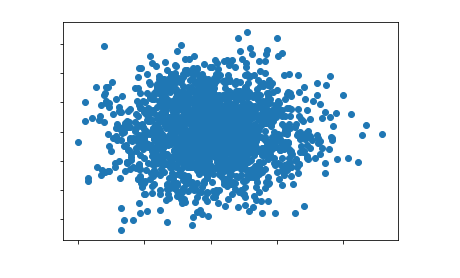

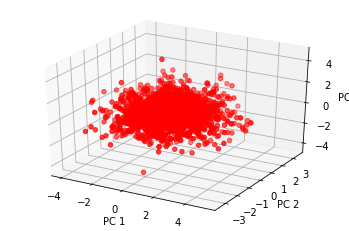

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca2D = PCA(n_components = 2)
pca3D = PCA(n_components = 3)

ohe_2D_results = pca2D.fit_transform(ohe_data)
ohe_3D_results = pca3D.fit_transform(ohe_data)

plt.title('PCA applied to dataset with One Hot Encoded Categorical Features, N = 2 & 3', color = 'w')
plt.scatter(ohe_2D_results[:,0], ohe_2D_results[:,1])
plt.xlabel("Principal Component 1", color = 'w')
plt.xticks(color = 'w')
plt.ylabel("Principal Component 2", color = 'w')
plt.yticks(color = 'w')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ohe_3D_results[:,0],ohe_3D_results[:,1],ohe_3D_results[:,2], c='r', marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

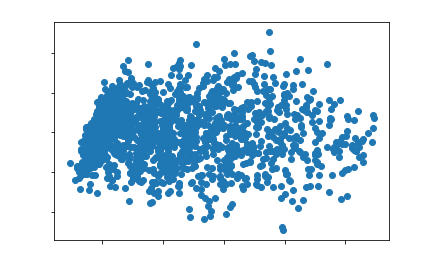

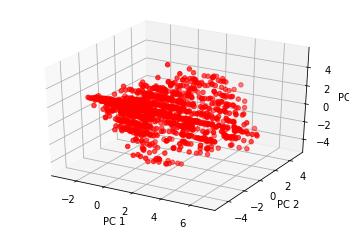

In [14]:
pca2D = PCA(n_components = 2)
pca3D = PCA(n_components = 3)

le_2D_results = pca2D.fit_transform(le_data)
le_3D_results = pca3D.fit_transform(le_data)

plt.title('PCA applied to dataset with Label Encoded Categorical Features, N = 2 & 3', color = 'w')
plt.scatter(le_2D_results[:,0], le_2D_results[:,1])
plt.xlabel("Principal Component 1", color = 'w')
plt.xticks(color = 'w')
plt.ylabel("Principal Component 2", color = 'w')
plt.yticks(color = 'w')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(le_3D_results[:,0],le_3D_results[:,1],le_3D_results[:,2], c='r', marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()